<a href="https://colab.research.google.com/github/DataMinati/TSA-Fauj/blob/main/The_Doge_Tale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import calendar


import seaborn as sns
import matplotlib.pyplot as plt   
from matplotlib.pyplot import pie
from matplotlib import gridspec
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob

In [2]:

CSV = 'https://raw.githubusercontent.com/DataMinati/Datasets-/master/Cryptocurrency/dogecoin.csv' #market cap price

df = pd.read_csv(CSV)
df = df.drop(columns=['Adj Close']) # identical with column 'Close'
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month_Num'] = df['Date'].dt.month
df['Month'] = df['Month_Num'].apply(lambda x: calendar.month_abbr[x])

df['YYYYMM'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m')

df['Close_log'] = np.log(df['Close'])

df['Return'] = df['Close'] / df['Open'][0] -1

# Elon Musk Tweets

CSV0 = 'https://raw.githubusercontent.com/DataMinati/Datasets-/master/Elon%20Tweets/2018.csv' #2018
CSV1 = 'https://raw.githubusercontent.com/DataMinati/Datasets-/master/Elon%20Tweets/2019.csv' #2019
CSV2 = 'https://raw.githubusercontent.com/DataMinati/Datasets-/master/Elon%20Tweets/2020.csv' #2020
CSV3 = 'https://raw.githubusercontent.com/DataMinati/Datasets-/master/Elon%20Tweets/2021.csv' #2021

df0 = pd.read_csv(CSV0)
df1 = pd.read_csv(CSV1)
df2 = pd.read_csv(CSV2)
df3 = pd.read_csv(CSV3)

df_musk = pd.concat([df0,df1,df2,df3])

df_musk = df_musk[df_musk['tweet'].str.contains('Doge','doge''@Doge')]
df_musk = df_musk[['date', 'tweet']] 

df_musk['date'] = pd.to_datetime(df_musk['date'])
df_musk['Date'] = df_musk['date'].dt.to_period("d")

df_musk['Year'] = df_musk['date'].dt.year
df_musk['Month_Num'] = df_musk['date'].dt.month
df_musk['Month'] = df_musk['Month_Num'].apply(lambda x: calendar.month_abbr[x])

df_musk['YYYYMM'] = pd.to_datetime(df_musk['date'], format='%Y%m', errors='coerce')
df_musk['YYYYMM'] = pd.to_datetime(df_musk['date']).dt.strftime('%Y%m')

df_musk['Date'] = (df_musk['Date']).dt.to_timestamp()

df_musk = df_musk.reset_index(drop=True)
df_musk = df_musk.sort_values(by=['YYYYMM'])

### Dogecoin Trend

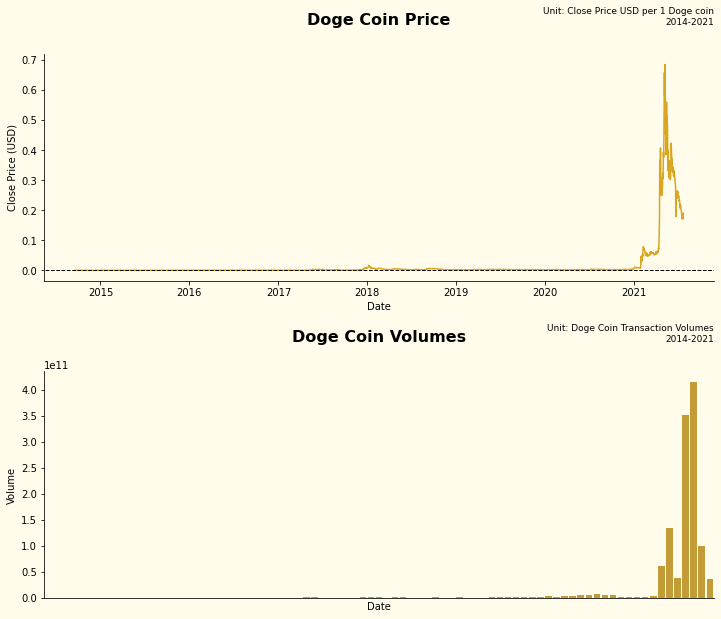

In [3]:
df_hm = pd.pivot_table(df, values="Volume", index=['Year', 'Month_Num'], aggfunc=np.sum)
df_hm.reset_index(level=0, inplace=True)
df_hm.reset_index(level=0, inplace=True)
df_hm['Date'] = pd.to_datetime((df_hm.Year*100+df_hm.Month_Num).apply(str),format='%Y%m').dt.strftime('%Y%m')
df_hm['Volume_log'] = np.log(df_hm['Volume'])

fig = plt.figure(figsize=(12,10))

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

fig.patch.set_facecolor('#FFFCEC')
fig.patch.set_alpha(1.0)

ax1 = plt.subplot(2,1,1)
ax1 = sns.lineplot(data=df, x="Date", y="Close", color="goldenrod")

ax1.patch.set_facecolor('#FFFCEC')
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

ax1 = plt.ylabel("Close Price (USD)")

ax1 = plt.axhline(0, 8, 0, color='black', linestyle='--', linewidth='1')



ax1 = plt.title('Unit: Close Price USD per 1 Doge coin\n2014-2021', fontsize = 9, loc='right')
ax1 = plt.title('Doge Coin Price',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax2 = plt.subplot(2,1,2)
ax2 = sns.barplot(x="Date", y="Volume", data=df_hm, color="goldenrod")

ax2.patch.set_facecolor('#FFFCEC')
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)
ax2 = plt.xticks([])

ax2 = plt.title('Unit: Doge Coin Transaction Volumes\n2014-2021', fontsize = 9, loc='right')
ax2 = plt.title('Doge Coin Volumes',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

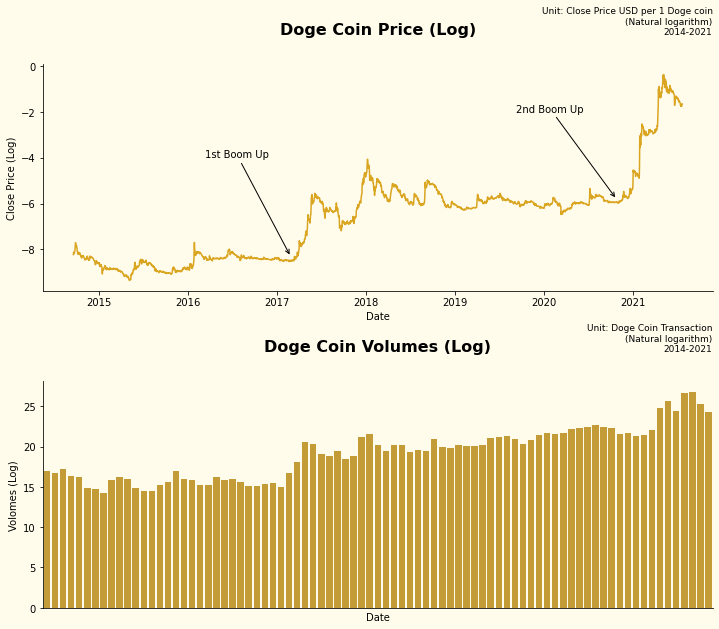

In [4]:
fig = plt.figure(figsize=(12,10))

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

fig.patch.set_facecolor('#FFFCEC')
fig.patch.set_alpha(1.0)


ax1 = plt.subplot(2,1,1)
ax1 = sns.lineplot(data=df, x="Date", y="Close_log", color="goldenrod")
ax1.patch.set_facecolor('#FFFCEC')
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

ax1 = plt.ylabel("Close Price (Log)")


ax1 = plt.annotate('1st Boom Up', xy=(pd.to_datetime('2017-02-25'),-8.3), xytext=(pd.to_datetime('2016-03-10'),-4)
                   ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3", facecolor='black'))
ax1 = plt.annotate('2nd Boom Up', xy=(pd.to_datetime('2020-10-25'),-5.8), xytext=(pd.to_datetime('2019-09-10'),-2)
                   ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3", facecolor='black'))


ax1 = plt.title('Unit: Close Price USD per 1 Doge coin\n(Natural logarithm)\n2014-2021', fontsize = 9, loc='right')
ax1 = plt.title('Doge Coin Price (Log)',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax2 = plt.subplot(2,1,2)
ax2 = sns.barplot(x="Date", y="Volume_log", data=df_hm, color="goldenrod")
ax2.patch.set_facecolor('#FFFCEC')
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)
ax2 = plt.xticks([])

ax2 = plt.ylabel("Volomes (Log)")

ax2 = plt.title('Unit: Doge Coin Transaction\n(Natural logarithm)\n2014-2021', fontsize = 9, loc='right')
ax2 = plt.title('Doge Coin Volumes (Log)',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

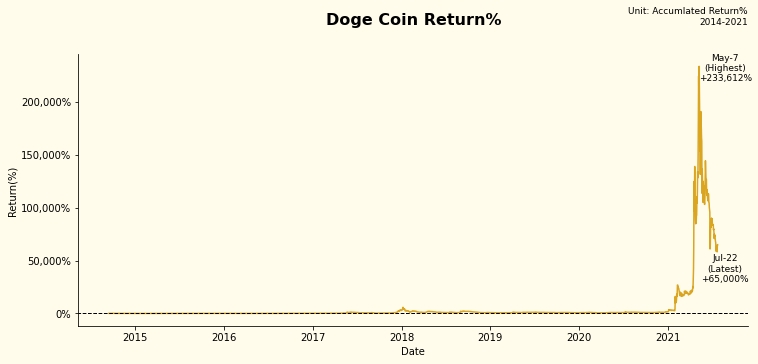

In [5]:
fig = plt.figure(figsize=(12,5))

fig.patch.set_facecolor('#FFFCEC')
fig.patch.set_alpha(1.0)


ax1 = sns.lineplot(data=df, x="Date", y="Return", color="goldenrod")

vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax1.patch.set_facecolor('#FFFCEC')
ax1.patch.set_alpha(1.0)


ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

ax1 = plt.ylabel("Return(%)")


ax1 = plt.axhline(0, 8, 0, color='black', linestyle='--', linewidth='1')


ax1 = plt.text(pd.to_datetime('2021-08-22'), 2200, 'May-7\n(Highest)\n+233,612%', fontsize=9, color='black', horizontalalignment='center')
ax1 = plt.text(pd.to_datetime('2021-08-22'), 300, 'Jul-22\n(Latest)\n+65,000%', fontsize=9, color='black', horizontalalignment='center')

ax1 = plt.title('Unit: Accumlated Return%\n2014-2021', fontsize = 9, loc='right')
ax1 = plt.title('Doge Coin Return%',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

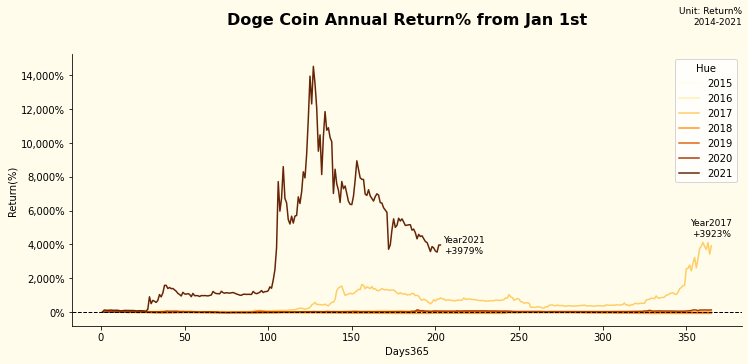

In [6]:
df2015 = df[df['Year']==2015]
df2015 = df2015.drop(columns=['Return'])
df2015.reset_index(level=0, inplace=True, drop = True)
df2015['Return'] = df2015['Close'] / df2015['Open'][0] -1
df2015.reset_index(level=0, inplace=True, drop = False)
df2015.rename(columns = {'index' : 'Days365'}, inplace = True)
df2015['Days365'] = df2015['Days365']+1
df2015['Hue'] = 2015
df2015 = df2015[['Days365','Return','Hue']] 

df2016 = df[df['Year']==2016]
df2016 = df2016.drop(columns=['Return'])
df2016.reset_index(level=0, inplace=True, drop = True)
df2016['Return'] = df2016['Close'] / df2016['Open'][0] -1
df2016 = df2016.drop([59]) # leap year
df2016.reset_index(level=0, inplace=True, drop = True)
df2016.reset_index(level=0, inplace=True, drop = False)
df2016.rename(columns = {'index' : 'Days365'}, inplace = True)
df2016['Days365'] = df2016['Days365']+1
df2016['Hue'] = 2016
df2016 = df2016[['Days365','Return','Hue']] 

df2017 = df[df['Year']==2017]
df2017 = df2017.drop(columns=['Return'])
df2017.reset_index(level=0, inplace=True, drop = True)
df2017['Return'] = df2017['Close'] / df2017['Open'][0] -1
df2017.reset_index(level=0, inplace=True, drop = False)
df2017.rename(columns = {'index' : 'Days365'}, inplace = True)
df2017['Days365'] = df2017['Days365']+1
df2017['Hue'] = 2017
df2017 = df2017[['Days365','Return','Hue']] 

df2018 = df[df['Year']==2018]
df2018 = df2018.drop(columns=['Return'])
df2018.reset_index(level=0, inplace=True, drop = True)
df2018['Return'] = df2018['Close'] / df2018['Open'][0] -1
df2018.reset_index(level=0, inplace=True, drop = False)
df2018.rename(columns = {'index' : 'Days365'}, inplace = True)
df2018['Days365'] = df2018['Days365']+1
df2018['Hue'] = 2018
df2018 = df2018[['Days365','Return','Hue']] 

df2019 = df[df['Year']==2019]
df2019 = df2019.drop(columns=['Return'])
df2019.reset_index(level=0, inplace=True, drop = True)
df2019['Return'] = df2019['Close'] / df2019['Open'][0] -1
df2019.reset_index(level=0, inplace=True, drop = False)
df2019.rename(columns = {'index' : 'Days365'}, inplace = True)
df2019['Days365'] = df2019['Days365']+1
df2019['Hue'] = 2019
df2019 = df2019[['Days365','Return','Hue']] 

df2020 = df[df['Year']==2020]
df2020 = df2020.drop(columns=['Return'])
df2020.reset_index(level=0, inplace=True, drop = True)
df2020['Return'] = df2020['Close'] / df2020['Open'][0] -1
df2020 = df2020.drop([59]) # leap year
df2020.reset_index(level=0, inplace=True, drop = True)
df2020.reset_index(level=0, inplace=True, drop = False)
df2020.rename(columns = {'index' : 'Days365'}, inplace = True)
df2020['Days365'] = df2020['Days365']+1
df2020['Hue'] = 2020
df2020 = df2020[['Days365','Return','Hue']] 

df2021 = df[df['Year']==2021]
df2021 = df2021.drop(columns=['Return'])
df2021.reset_index(level=0, inplace=True, drop = True)
df2021['Return'] = df2021['Close'] / df2021['Open'][0] -1
df2021.reset_index(level=0, inplace=True, drop = False)
df2021.rename(columns = {'index' : 'Days365'}, inplace = True)
df2021['Days365'] = df2021['Days365']+1
df2021['Hue'] = 2021
df2021 = df2021[['Days365','Return','Hue']] 

df_RTN = pd.concat([df2015,df2016,df2017,df2018,df2019,df2020,df2021])

fig = plt.figure(figsize=(12,5))

fig.patch.set_facecolor('#FFFCEC')
fig.patch.set_alpha(1.0)

ax1 = sns.lineplot(data=df_RTN, x="Days365", y="Return", hue="Hue", palette="YlOrBr")
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax1.patch.set_facecolor('#FFFCEC')
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

ax1 = plt.ylabel("Return(%)")

ax1 = plt.axhline(0, 8, 0, color='black', linestyle='--', linewidth='1')

ax1 = plt.text(365, 45, 'Year2017\n+3923%', fontsize=9, color='black', horizontalalignment='center')
ax1 = plt.text(217, 35, 'Year2021\n+3979%', fontsize=9, color='black', horizontalalignment='center')

ax1 = plt.title('Unit: Return%\n2014-2021', fontsize = 9, loc='right')
ax1 = plt.title('Doge Coin Annual Return% from Jan 1st',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); 

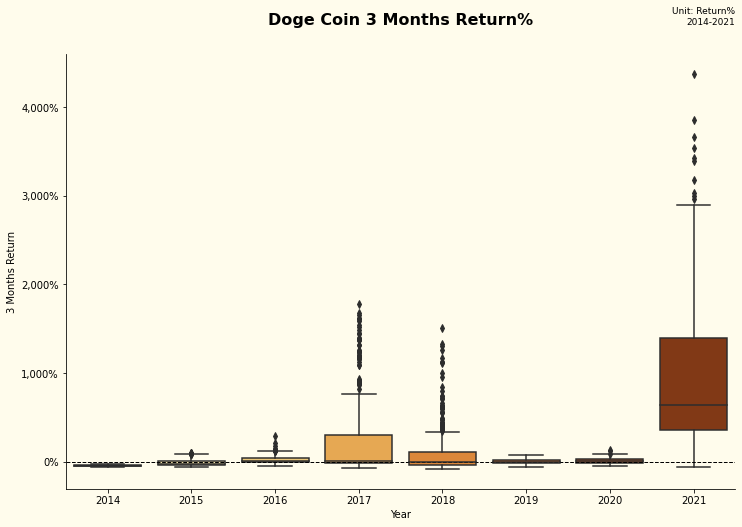

In [7]:
df_dist1 = df[:]
df_dist1['Join Date'] = (df_dist1['Date'] - pd.DateOffset(months=3))

df_dist2 = df[:]
df_dist2.rename(columns = {"Date": "Join Date", "Close": "Close 3M"}, inplace=True)

df_dist = pd.merge(left=df_dist1, right=df_dist2, how='left', on=['Join Date'], sort=False)
df_dist['3 Months Return'] = df_dist['Close'] / df_dist['Close 3M'] -1 
df_dist.rename(columns = {"Year_x": "Year"}, inplace=True)

fig = plt.figure(figsize=(12,8))

fig.patch.set_facecolor('#FFFCEC')
fig.patch.set_alpha(1.0)

ax1 = sns.boxplot(data=df_dist, x="Year", y="3 Months Return", palette="YlOrBr")

vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax1.patch.set_facecolor('#FFFCEC')
ax1.patch.set_alpha(1.0)


ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)


ax1 = plt.axhline(0, 8, 0, color='black', linestyle='--', linewidth='1')


ax1 = plt.title('Unit: Return%\n2014-2021', fontsize = 9, loc='right')
ax1 = plt.title('Doge Coin 3 Months Return%',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

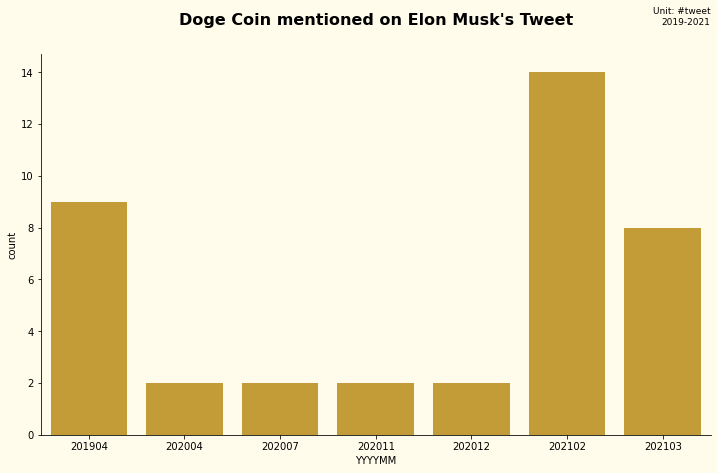

In [8]:
fig = plt.figure(figsize=(12,7))

fig.patch.set_facecolor('#FFFCEC')
fig.patch.set_alpha(1.0)

ax2 = sns.countplot(x="YYYYMM", data=df_musk, color="goldenrod")

ax2.patch.set_facecolor('#FFFCEC')
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)

ax2 = plt.title('Unit: #tweet\n2019-2021', fontsize = 9, loc='right')
ax2 = plt.title('Doge Coin mentioned on Elon Musk\'s Tweet',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); 

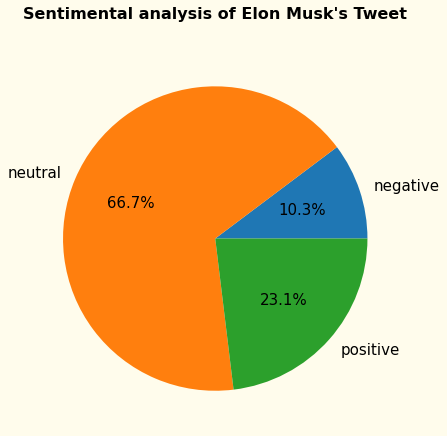

In [9]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

df_musk['subjectivity'] = df_musk['tweet'].apply(getSubjectivity)
df_musk['polarity'] = df_musk['tweet'].apply(getPolarity)
def getsentiment(score):
 if score < 0:
  return 'negative'
 elif score == 0:
  return 'neutral'
 else:
  return 'positive'
df_musk['sentiment'] = df_musk['polarity'].apply(getsentiment)

fig = plt.figure(figsize=(7,7))

fig.patch.set_facecolor('#FFFCEC')
fig.patch.set_alpha(1.0)

sums = df_musk.date.groupby(df_musk.sentiment).count()
pie(sums, labels=sums.index, autopct='%.1f%%', textprops={'fontsize': 15})

ax1 = plt.title('Sentimental analysis of Elon Musk\'s Tweet',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

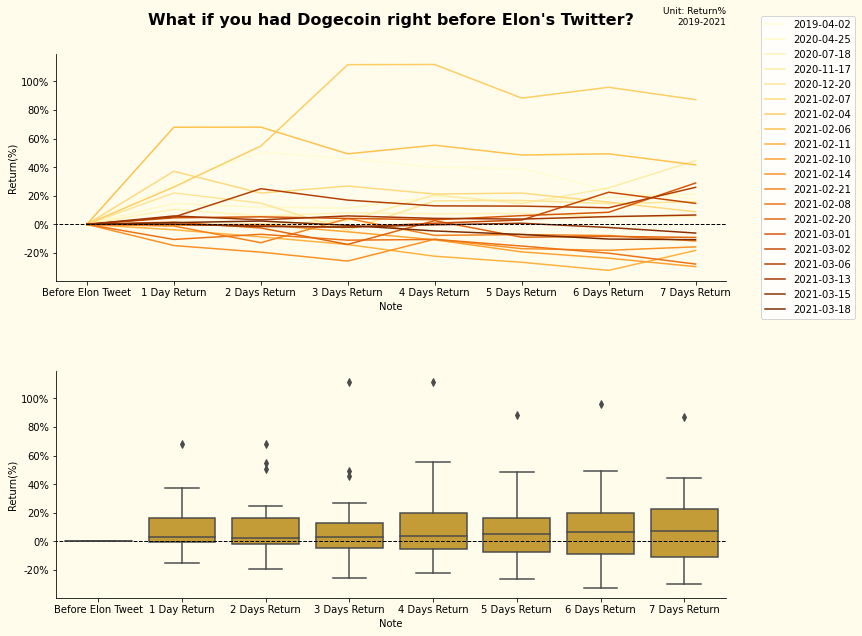

In [10]:
Close_Info = df[['Date','Close']]
Close_Info.rename(columns = {"Date": "Join Date"}, inplace=True)

Open_Info = df[['Date','Open']]

df_musk0 = df_musk[['tweet','Date']]
df_musk0['Join Date'] = df_musk0['Date']
df_musk0 = pd.merge(left=df_musk0, right=Open_Info, how='left', on=['Date'], sort=False)
df_musk0.rename(columns = {"Open": "Close"}, inplace=True)
#df_musk0 = df_musk0.drop(columns=['Open'])
df_musk0['Note'] = "Before Elon Tweet"

df_musk1 = df_musk[['tweet','Date']]
df_musk1['Join Date'] = (df_musk1['Date'] + pd.DateOffset(days=1))
df_musk1 = pd.merge(left=df_musk1, right=Close_Info, how='left', on=['Join Date'], sort=False)
df_musk1['Note'] = "1 Day Return"

df_musk2 = df_musk[['tweet','Date']]
df_musk2['Join Date'] = (df_musk2['Date'] + pd.DateOffset(days=2))
df_musk2 = pd.merge(left=df_musk2, right=Close_Info, how='left', on=['Join Date'], sort=False)
df_musk2['Note'] = "2 Days Return"

df_musk3 = df_musk[['tweet','Date']]
df_musk3['Join Date'] = (df_musk3['Date'] + pd.DateOffset(days=3))
df_musk3 = pd.merge(left=df_musk3, right=Close_Info, how='left', on=['Join Date'], sort=False)
df_musk3['Note'] = "3 Days Return"

df_musk4 = df_musk[['tweet','Date']]
df_musk4['Join Date'] = (df_musk4['Date'] + pd.DateOffset(days=4))
df_musk4 = pd.merge(left=df_musk4, right=Close_Info, how='left', on=['Join Date'], sort=False)
df_musk4['Note'] = "4 Days Return"

df_musk5 = df_musk[['tweet','Date']]
df_musk5['Join Date'] = (df_musk5['Date'] + pd.DateOffset(days=5))
df_musk5 = pd.merge(left=df_musk5, right=Close_Info, how='left', on=['Join Date'], sort=False)
df_musk5['Note'] = "5 Days Return"

df_musk6 = df_musk[['tweet','Date']]
df_musk6['Join Date'] = (df_musk6['Date'] + pd.DateOffset(days=6))
df_musk6 = pd.merge(left=df_musk6, right=Close_Info, how='left', on=['Join Date'], sort=False)
df_musk6['Note'] = "6 Days Return"

df_musk7 = df_musk[['tweet','Date']]
df_musk7['Join Date'] = (df_musk7['Date'] + pd.DateOffset(days=7))
df_musk7 = pd.merge(left=df_musk7, right=Close_Info, how='left', on=['Join Date'], sort=False)
df_musk7['Note'] = "7 Days Return"

df_musk_all = pd.concat([df_musk0, df_musk1,df_musk2,df_musk3, df_musk4,df_musk5,df_musk6,df_musk7])

df_musk_all = pd.merge(left=df_musk_all, right=Open_Info, how='left', on=['Date'], sort=False)
df_musk_all['Return'] = df_musk_all['Close'] / df_musk_all['Open'] -1
df_musk_all = df_musk_all[['Date', 'Note', 'Join Date', 'Open', 'Close', 'Return']]
df_musk_all = df_musk_all.drop_duplicates()

df_musk_all['Date'] = df_musk_all['Date'].dt.to_period("d")

fig = plt.figure(figsize=(12,10))

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

fig.patch.set_facecolor('#FFFCEC')
fig.patch.set_alpha(1.0)

ax1 = plt.subplot(2,1,1)
ax1 = sns.lineplot(data=df_musk_all, x="Note", y="Return", hue="Date", palette="YlOrBr")

vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax1.patch.set_facecolor('#FFFCEC')
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

ax1 = plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

ax1 = plt.ylabel("Return(%)")

ax1 = plt.axhline(0, 8, 0, color='black', linestyle='--', linewidth='1')


ax1 = plt.title('Unit: Return%\n2019-2021', fontsize = 9, loc='right')
ax1 = plt.title('What if you had Dogecoin right before Elon\'s Twitter?',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax2 = plt.subplot(2,1,2)

ax2 = sns.boxplot(data=df_musk_all, x="Note", y="Return", color="goldenrod")

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax2.patch.set_facecolor('#FFFCEC')
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)

ax2 = plt.ylabel("Return(%)")

ax2 = plt.axhline(0, 8, 0, color='black', linestyle='--', linewidth='1'); #semi-colon for h

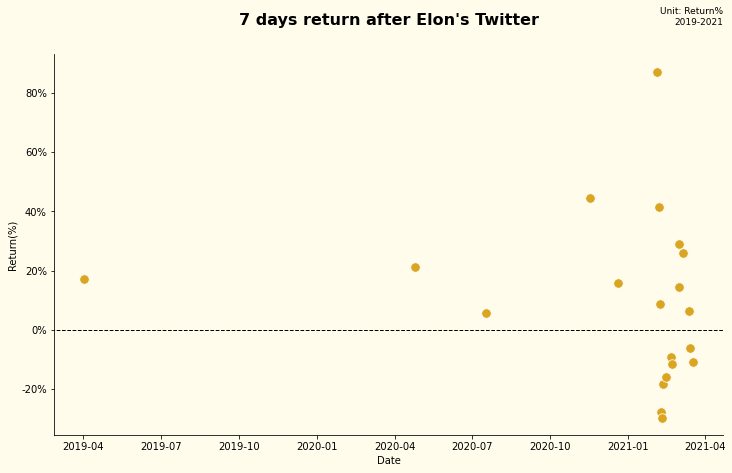

In [11]:
df_musk7x = pd.merge(left=df_musk7, right=Open_Info, how='left', on=['Date'], sort=False)
df_musk7x['Return'] = df_musk7x['Close'] / df_musk7x['Open'] -1
df_musk7x = df_musk7x[['Date','Return']]
df_musk7x = df_musk7x.drop_duplicates()
df_musk7x = df_musk7x.sort_values(by=['Date'])

fig = plt.figure(figsize=(12,7))

fig.patch.set_facecolor('#FFFCEC')
fig.patch.set_alpha(1.0)

ax1 = sns.scatterplot(data=df_musk7x, x="Date", y="Return", s=90, color="goldenrod")
ax1.patch.set_facecolor('#FFFCEC')
ax1.patch.set_alpha(1.0)


vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

ax1 = plt.ylabel("Return(%)")



ax1 = plt.axhline(0, 8, 0, color='black', linestyle='--', linewidth='1')


ax1 = plt.title('Unit: Return%\n2019-2021', fontsize = 9, loc='right')
ax1 = plt.title('7 days return after Elon\'s Twitter',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output


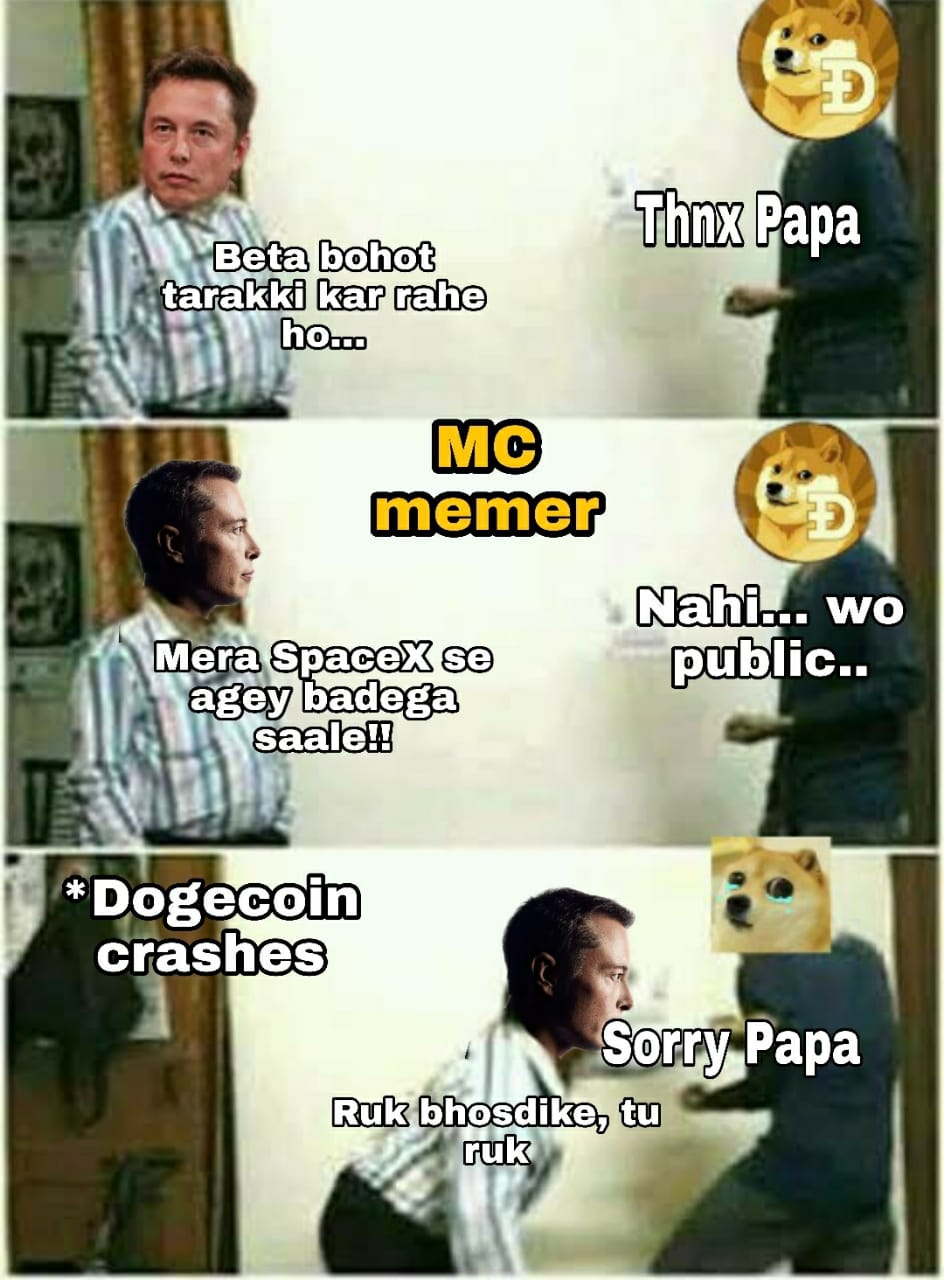

In [14]:
from IPython.display import Image
Image('/content/meme.jpeg')